#AUTOLIB ELECTRICAL CAR SHARING SERVICE(IP WEEK 4)

#1. Defining the Question

###a) Specifying the Data Analytic Question 

We are conducting hypothesis testing to either accept or fail to accept a null hypothesis.

Null Hypothesis: On average, the number of bluecars taken on weekends are greater than or equal to the number of bluecars returned on weekends.

Alternative Hypothesis: On average,the number of bluecars taken on the weekend are less than that of the bluecars returned on the weekend.

###b) Defining the Metric for Success

The metric of success for this hypothesis testing is to either accept or reject the null hypothesis based on the evidence drawn from our statistical analysis.

###c) Understanding the Context

Autolib is an electric car-sharing service which began in Paris and operates in several French cities. It is a concept that has now gone global. This model allows drivers to rent and return electric cars through this simple four-step process: subscribe, rent, drive and pass it on.  Autolib provides an accessible answer to automobile ownership.

###d) Recording the Experimental Design

For the Hypothesis Testing, I will perform the following actions: 

1.Clean the Dataset first before Analysis. For the cleaning part, I will check for outliers, anomalies, missing values,checking for duplicates,dropping unnecessary columns and changing the column names into lowercase for uniformity and stripping off whitespaces and dashes.

2.I will perfom the Analysis.

3.I will the perform EDA.

4.Afterwards I will perform hypothesis testing using Statified Sampling Technique.

5.I will either accept or reject the null hypothesis.

6.Challenge the solution.

7.Fomulate follow-up question.

###e) Data Relevance

The source of this dataset has not been stated. It contains information about how Bluecars and Utilib cars are hired and returned through the days of the week between January 2018 to June 2018.

#2) Reading the Data

In [ ]:
#Importing the Libraries that we will use

# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

# Loading the Data from the source
autolib=pd.read_csv('autolib.csv')

#3) Checking the Data

In [ ]:
# Checking the number of rows and columns
autolib.shape

(16085, 13)

In [ ]:
# Previewing the first five records
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Previewing the last five records
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Checking all the columns have the appropriate Datatype
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
# Checking the information about the Dataset
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
# Checking the statistical information of the numerical values in our Dataset
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


#4) External Data Source Validation

#5) Tidying the Dataset

In [ ]:
# Checking for Outliers
Q1 =autolib.quantile(0.25)

# Calculating the Third Quartile
Q3 = autolib.quantile(0.75)

# Calculating the Quartile Range
IQR = Q3 - Q1

print((autolib < (Q1 - 1.5 * IQR)) | (autolib > (Q3 + 1.5 * IQR)))
print('-------------------------------------------------------------------------------')

#Displaying the number of outliers in the fields where the exist
print(IQR)

       BlueCars_returned_sum  BlueCars_taken_sum  Postal code  \
0                      False               False         True   
1                      False               False         True   
2                      False               False         True   
3                      False               False         True   
4                      False               False         True   
...                      ...                 ...          ...   
16080                  False               False        False   
16081                  False               False        False   
16082                  False               False        False   
16083                  False               False        False   
16084                  False               False        False   

       Slots_freed_sum  Slots_taken_sum  Utilib_14_returned_sum  \
0                 True             True                   False   
1                 True             True                   False   
2                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Removing the Outliers
autolib = autolib[~((autolib < (Q1 - 1.5 * IQR)) | (autolib > (Q3 + 1.5 * IQR))).any(axis=1)]
autolib.shape 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(9783, 13)

In [ ]:
# Find the total Missing Data in each column
#
autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

Our dataset does not conatin any missing values.

In [ ]:
#To ensure uniformity,we will change the column names to lower case, stripping of the whitespaces,removing periods, 
#this ensures good readerbility plus every possible naming issue is covered.

autolib.columns = autolib.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
autolib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 3899 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             9783 non-null   int64 
 1   date                    9783 non-null   object
 2   n_daily_data_points     9783 non-null   int64 
 3   dayofweek               9783 non-null   int64 
 4   day_type                9783 non-null   object
 5   bluecars_taken_sum      9783 non-null   int64 
 6   bluecars_returned_sum   9783 non-null   int64 
 7   utilib_taken_sum        9783 non-null   int64 
 8   utilib_returned_sum     9783 non-null   int64 
 9   utilib_14_taken_sum     9783 non-null   int64 
 10  utilib_14_returned_sum  9783 non-null   int64 
 11  slots_freed_sum         9783 non-null   int64 
 12  slots_taken_sum         9783 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 1.0+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [ ]:
# Changing the datatype of date from object to DateTime
autolib['date']= pd.to_datetime(autolib['date'])
autolib.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


postal_code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayofweek                          int64
day_type                          object
bluecars_taken_sum                 int64
bluecars_returned_sum              int64
utilib_taken_sum                   int64
utilib_returned_sum                int64
utilib_14_taken_sum                int64
utilib_14_returned_sum             int64
slots_freed_sum                    int64
slots_taken_sum                    int64
dtype: object

In [ ]:
# Checking for any duplicates in the dataset
#
autolib.duplicated().sum()

0

In [ ]:
# Dropping the columns that we will not use in this hypothesis test 
autolib=autolib.drop(['n_daily_data_points','utilib_taken_sum','utilib_returned_sum','utilib_14_taken_sum','utilib_14_returned_sum','slots_freed_sum','slots_taken_sum'], axis=1)

In [ ]:
# Exporting our cleaned dataset
#
autolib.to_csv("autolib_clean.csv", index=False)

In [ ]:
# Lets read our dataset from our CSV file and create a dataframe that we will use
#
autolib_df=pd.read_csv('autolib_clean.csv')

# Previewing the first five records
autolib_df.head()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,91330,2018-01-01,0,weekday,19,9
1,91330,2018-01-02,1,weekday,10,10
2,91330,2018-01-03,2,weekday,11,13
3,91330,2018-01-05,4,weekday,10,6
4,91330,2018-01-07,6,weekend,28,17


#6. Exploratory Data Analysis

####6.1 Univariate Analysis

In [ ]:
# Getting a description of the statistics of numerical values
autolib_df.describe()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
count,9783.000000,9783.000000,9783.000000,9783.000000
mean,93104.755188,2.979454,49.242870,49.222324
std,1012.235885,2.074932,46.303795,46.223838
min,91330.000000,0.000000,0.000000,0.000000
25%,92270.000000,1.000000,17.000000,17.000000
50%,93110.000000,3.000000,34.000000,34.000000
75%,94100.000000,5.000000,67.000000,67.000000
max,95880.000000,6.000000,293.000000,301.000000


Text(0.5, 1.0, 'Histogram on the bluecars taken on the weedays')

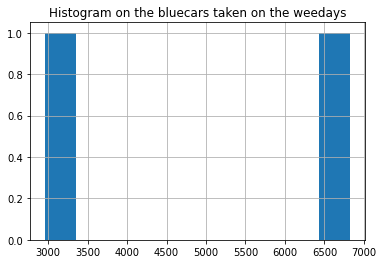

In [ ]:
# Plotting a histogram of bluecars taken on weekdays
autolib_df['bluecars_taken_sum'].groupby(autolib_df['day_type']=='weekday').count().hist()
plt.title('Histogram on the bluecars taken on the weedays')

Text(0.5, 1.0, 'Histogram on the bluecars taken on the weekends')

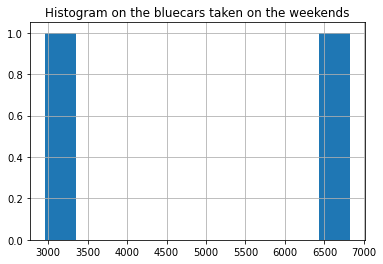

In [ ]:
# Plotting a histogram of bluecars taken on weekends
autolib_df['bluecars_taken_sum'].groupby(autolib_df['day_type']=='weekend').count().hist()
plt.title('Histogram on the bluecars taken on the weekends')

Text(0.5, 1.0, 'Histogram on the bluecars returned on the weekdays')

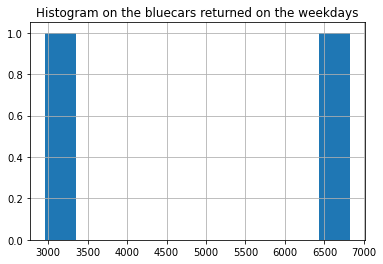

In [ ]:
# Plotting a histogram of bluecars  on weekdays
autolib_df['bluecars_returned_sum'].groupby(autolib_df['day_type']=='weekday').count().hist()
plt.title('Histogram on the bluecars returned on the weekdays')

Text(0.5, 1.0, 'Histogram on the bluecars returned on the weekends')

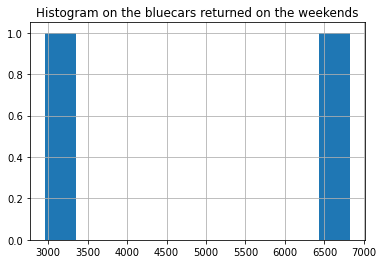

In [ ]:
# Plotting a histogram of bluecars returned on weekend
autolib_df['bluecars_returned_sum'].groupby(autolib_df['day_type']=='weekend').count().hist()
plt.title('Histogram on the bluecars returned on the weekends')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

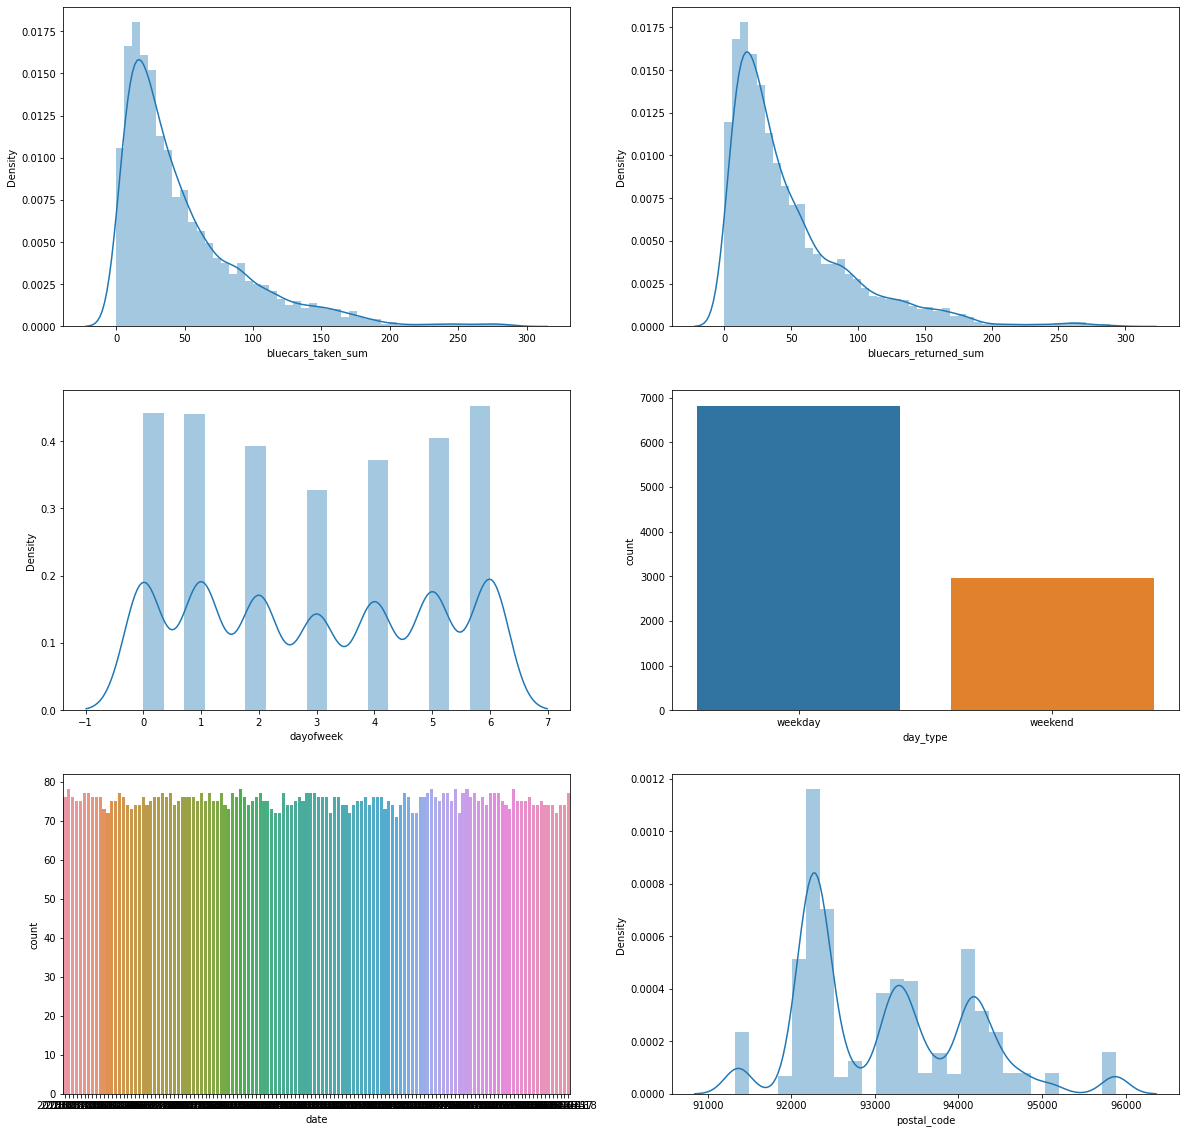

In [ ]:
fig,axes=plt.subplots(3,2, figsize=(20,20))
sns.distplot(autolib_df['bluecars_taken_sum'], kde=True, ax=axes[0,0])
sns.distplot(autolib_df['bluecars_returned_sum'].dropna(), kde=True, ax=axes[0,1])
sns.distplot(autolib_df['dayofweek'].dropna(), kde=True, ax=axes[1,0])
sns.countplot('day_type', data=autolib_df, ax=axes[1,1])
sns.countplot('date', data=autolib_df, ax=axes[2,0])
sns.distplot(autolib_df['postal_code'].dropna(), kde=True, ax=axes[2,1])

####6.2 Bivariate Analysis

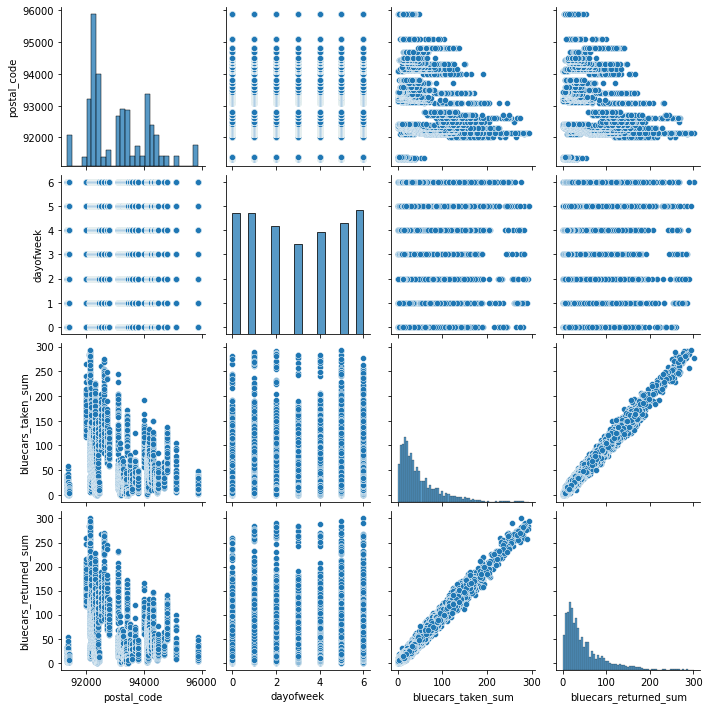

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(autolib_df)
plt.show()

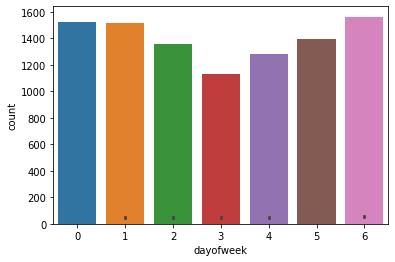

In [ ]:
#Plots used are: bar plot and count plot
sns.barplot(x='dayofweek',y='bluecars_returned_sum',data=autolib_df)
sns.countplot(x='dayofweek',data=autolib_df)

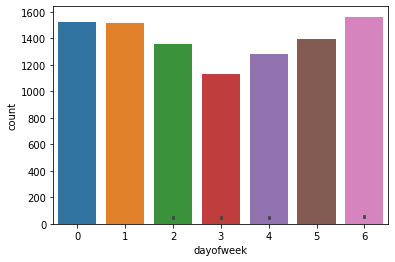

In [ ]:
#Plots used are: bar plot and count plot
sns.barplot(x='dayofweek',y='bluecars_taken_sum',data=autolib_df)
sns.countplot(x='dayofweek',data=autolib_df)

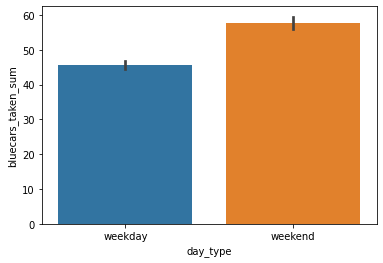

In [ ]:
#Plots used are: bar plot
sns.barplot(x='day_type',y='bluecars_taken_sum',data=autolib_df)

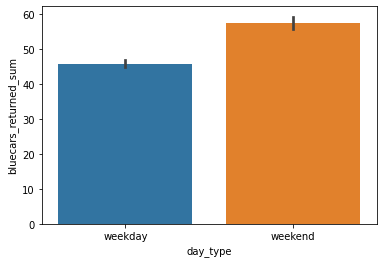

In [ ]:
#Plots used are: bar plot
sns.barplot(x='day_type',y='bluecars_returned_sum',data=autolib_df)

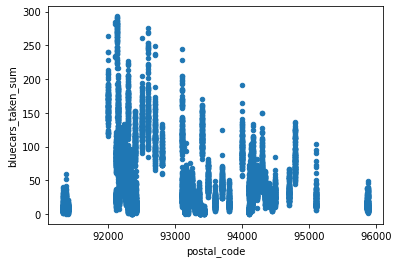

In [ ]:
# A scatter plot to check if there is ant correlation between postal code and bluecars taken
autolib_df.plot(x='postal_code', y='bluecars_taken_sum', kind='scatter')
plt.show()

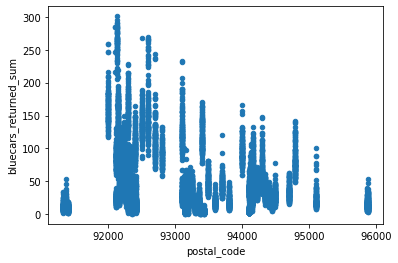

In [ ]:
# A scatter plot to check if there is ant correlation between postal code and bluecars returned
autolib_df.plot(x='postal_code', y='bluecars_returned_sum', kind='scatter')
plt.show()

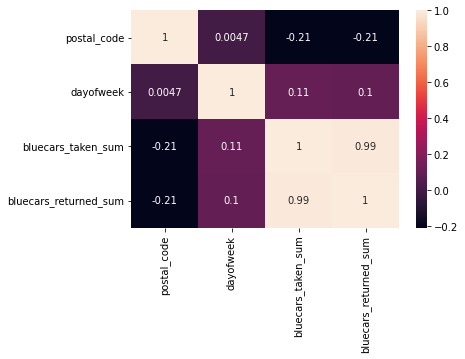

In [ ]:
# Plotting a heatmap to show the correlation between the different numerical  variables
sns.heatmap(autolib_df.corr(),annot=True)

As per the heatmap, the following can be concluded:

1.A strong correlation exists between bluecars taken and bluecars returned.
2.There is a weak correlation between bluecars taken and postal code, as well as bluecars returned ans postal code.

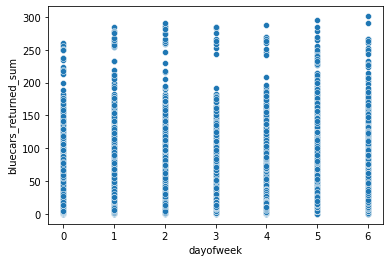

In [ ]:
# A scatter plot to check if there is ant correlation between day of the week and bluecars returned
sns.scatterplot(x=autolib_df['dayofweek'], y=autolib_df['bluecars_returned_sum'])

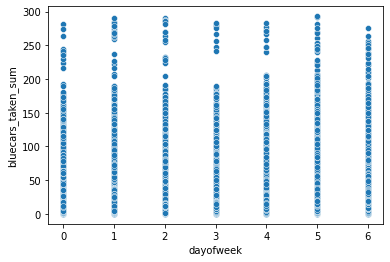

In [ ]:
# A scatter plot to check if there is ant correlation between day of the week and bluecars taken
sns.scatterplot(x=autolib_df['dayofweek'], y=autolib_df['bluecars_taken_sum'])

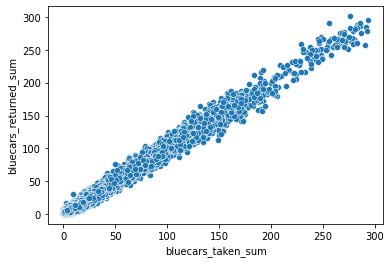

In [ ]:
# Plotting a scatterplot to show if there is any correlation between bluecars taken and bluecars returned
sns.scatterplot(x=autolib_df['bluecars_taken_sum'], y=autolib_df['bluecars_returned_sum'])

In [ ]:
# Calculating the pearson coefficient
autolib_df["bluecars_taken_sum"].corr(autolib_df["bluecars_returned_sum"]) 

0.992041181514075

This shows a very strong positive correlation between bluecars taken and bluecars returned. An increase in one leads to the increase of the other.

#7. Implementation of the Solution

###Hypothesis Testing

Null Hypothesis: On average, the number of bluecars taken on weekends are greater than or equal to the number of bluecars returned on weekends.

Alternative Hypothesis: On average,the number of bluecars taken on the weekend are less than that of the bluecars returned on the weekend.

<function matplotlib.pyplot.show>

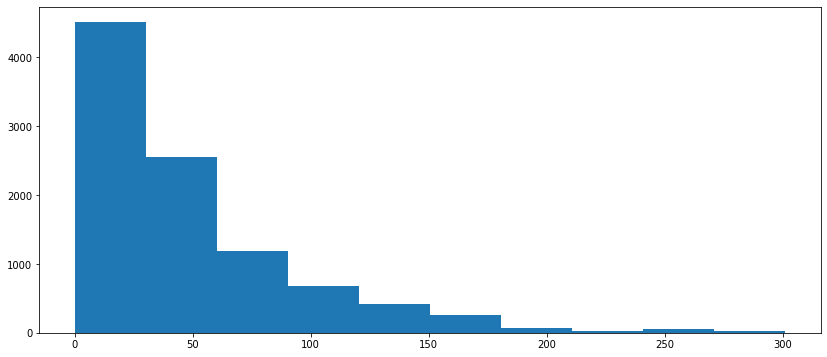

In [ ]:
# Testing for Normality using Histograms
# Plotting a histogram to see whether out data is normally distributed
plt.figure(figsize=(14,6))
plt.hist(autolib_df['bluecars_returned_sum'])
plt.show

<function matplotlib.pyplot.show>

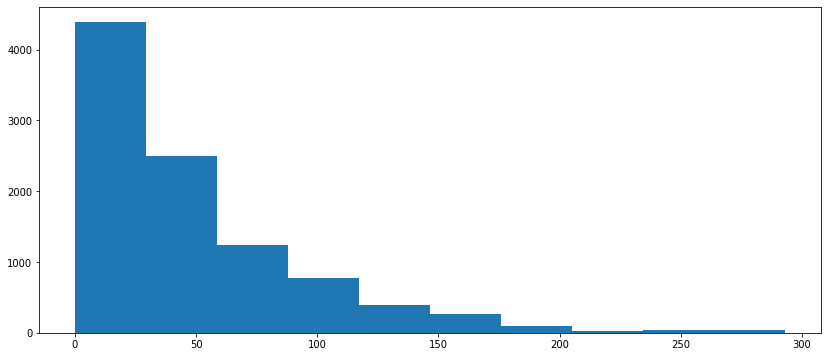

In [ ]:
# Plotting a histogram to see whether out data is normally distributed
plt.figure(figsize=(14,6))
plt.hist(autolib_df['bluecars_taken_sum'])
plt.show

From both graphs, our data does not seem to be normally distributed. It is skewed on the right.

In [ ]:
# Testing for Normality using Shapiro Test
from scipy.stats import shapiro

# Testing for normality of bluecars taken
stat, p=shapiro(autolib_df['bluecars_taken_sum'])
print ('Statictics=%.3f, p=%.3f' %(stat,p))

#Interpreting the p value
alpha=0.05
if p > alpha:
  print('Sample is a Normal Distribution')
else:
  print('Sample is not a Normal Distribution')


Statictics=0.825, p=0.000
Sample is not a Normal Distribution


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Testing for normality of bluecars taken
stat, p=shapiro(autolib_df['bluecars_returned_sum'])
print ('Statictics=%.3f, p=%.3f' %(stat,p))

#Interpreting the p value
alpha=0.05
if p > alpha:
  print('Sample is a Normal Distribution')
else:
  print('Sample is not a Normal Distribution')

Statictics=0.823, p=0.000
Sample is not a Normal Distribution


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Startified Sampling

In [ ]:
# Stratified sample
strat_output = autolib_df.groupby('day_type', group_keys=False).apply(lambda grouped_subset:grouped_subset.sample(frac=0.1))

# Check the stratified output
print(strat_output)

      postal_code        date  dayofweek day_type  bluecars_taken_sum  \
5875        93310  2018-02-23          4  weekday                  11   
8644        94340  2018-02-05          0  weekday                  25   
2104        92240  2018-05-30          2  weekday                 102   
4669        92800  2018-02-02          4  weekday                 113   
3175        92340  2018-02-14          2  weekday                   8   
...           ...         ...        ...      ...                 ...   
5559        93230  2018-04-22          6  weekend                  21   
7289        94000  2018-05-06          6  weekend                 115   
9694        95880  2018-02-17          5  weekend                  23   
3737        92380  2018-04-22          6  weekend                  38   
3825        92390  2018-03-04          6  weekend                  13   

      bluecars_returned_sum  
5875                     14  
8644                     29  
2104                    100  
466

In [ ]:
# Finding the mean of bluecars taken
mean_a=strat_output['bluecars_taken_sum'].mean()
mean_a

49.49897750511247

In [ ]:
# Finding the mean of bluecars returned
mean_b=strat_output['bluecars_returned_sum'].mean()
mean_b

49.307770961145195

Conducting a T-test

In [ ]:
from scipy.stats import ttest_ind

# Calculating the statistical value and the p_value
ttest,p_value=ttest_ind(strat_output['bluecars_taken_sum'],strat_output['bluecars_returned_sum'])

print('This is our p_value', p_value)
print('This is value of the Statistical Value', ttest)

if p_value < 0.05:
  print("We reject the Null Hypothesis")
else:
  print("We accept the Null Hypothesis")

This is our p_value 0.9293323888923636
This is value of the Statistical Value 0.0886962666222155
We accept the Null Hypothesis


Point Estimation

In [ ]:
# Finding the Population mean for bluecars taken
population=autolib_df[autolib_df['day_type']=='weekend']
population_mean=population['bluecars_taken_sum'].mean()

# Point Estimator
population_mean-mean_a

8.219551013281048

In [ ]:
# Finding the Population mean for bluecars returned
population=autolib_df[autolib_df['day_type']=='weekend']
population_mean=population['bluecars_returned_sum'].mean()

# Point Estimator
population_mean-mean_b

8.046937105003977

Confidence Level

In [ ]:
# Confidence level for bluecars taken
# sample size
sample_size=len(strat_output['bluecars_taken_sum'])
print(sample_size)
# Standard Error
standard_error= strat_output['bluecars_taken_sum'].std()/np.sqrt(sample_size)
print(standard_error)
# Confidence interval
from scipy.stats import norm
norm.interval(0.95, loc=mean_a, scale=standard_error)


978
1.5295513827792504


(46.5011118823617, 52.496843127863244)

In [ ]:
# Confidence level for bluecars returned
# sample size
sample_size=len(strat_output['bluecars_returned_sum'])
print(sample_size)
# Standard Error
standard_error= strat_output['bluecars_returned_sum'].std()/np.sqrt(sample_size)
print(standard_error)
# Confidence interval
from scipy.stats import norm
norm.interval(0.95, loc=mean_a, scale=standard_error)

978
1.5191147394140858


(46.521567327476916, 52.476387682748026)

### Conclusion
We accept out Null Hypothesis: On average, the number of bluecars taken on weekends are greater than or equal to the number of bluecars returned on weekends. This is because our p_value (0.9836607848126168) is greater than aplha (0.05)

# 8. Challenging the Solution

Since our data was not normally distributed, I used the log10 transformation to challenge the outcome of the normality test. After the log10 transformation, the trend of the data depicted a close to normal distribution when ploted on a histogram as shown below.

In [ ]:
# Creating a copy of the original data so that we do not tamper with it.
bluecars=strat_output[['bluecars_returned_sum','bluecars_taken_sum']].copy
bluecars

<bound method NDFrame.copy of       bluecars_returned_sum  bluecars_taken_sum
5875                     14                  11
8644                     29                  25
2104                    100                 102
4669                    116                 113
3175                      5                   8
...                     ...                 ...
5559                     26                  21
7289                    113                 115
9694                     19                  23
3737                     27                  38
3825                     12                  13

[978 rows x 2 columns]>

In [ ]:
# creating a variable to store the copy of our original data
inp_array=bluecars
print("Input array: ", inp_array)

Input array:  <bound method NDFrame.copy of       bluecars_returned_sum  bluecars_taken_sum
5875                     14                  11
8644                     29                  25
2104                    100                 102
4669                    116                 113
3175                      5                   8
...                     ...                 ...
5559                     26                  21
7289                    113                 115
9694                     19                  23
3737                     27                  38
3825                     12                  13

[978 rows x 2 columns]>


In [ ]:
# Transforming the data using long10
out_array=np.log10(bluecars('bluecars_taken_sum'))
print("Output array: ", out_array)

Output array:        bluecars_returned_sum  bluecars_taken_sum
5875               1.146128            1.041393
8644               1.462398            1.397940
2104               2.000000            2.008600
4669               2.064458            2.053078
3175               0.698970            0.903090
...                     ...                 ...
5559               1.414973            1.322219
7289               2.053078            2.060698
9694               1.278754            1.361728
3737               1.431364            1.579784
3825               1.079181            1.113943

[978 rows x 2 columns]


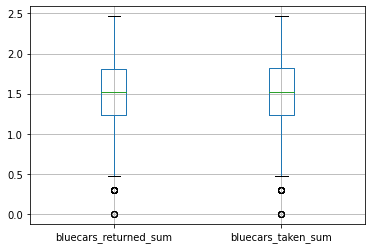

In [ ]:
# Checking for outliers after the transformation
out_array.boxplot(column=['bluecars_returned_sum','bluecars_taken_sum'])
plt.show()

In [ ]:
pip install quantstats -U --no-cache-dir

     |████████████████████████████████| 40 kB 8.7 MB/s 
     |████████████████████████████████| 63 kB 27.7 MB/s 
     |████████████████████████████████| 6.4 MB 40.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


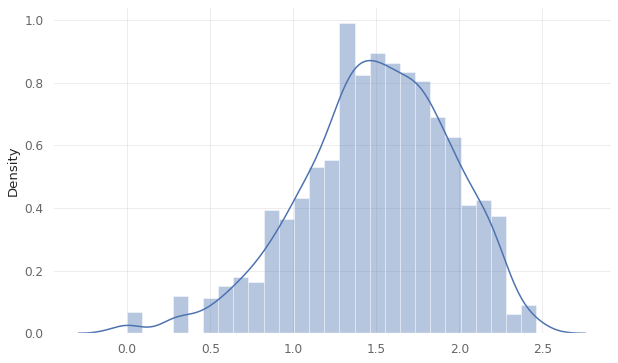

In [ ]:
import quantstats as qs
# Removing any infity values that might exist in our data
out_array1 = out_array.replace([np.inf, -np.inf, -0], 0)
# Plotting our transformed data
sns.distplot(out_array1)

#9. Follow-up Questions

1. Why are BlueCars on high demand than the Utilib Cars?